# Survival Analysis

In [158]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.metrics import concordance_index_censored

from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold

from mm_survival.pipelines import run_survival_analysis

In [113]:
tpm_rna_filename = 'data/gene_expression/MMRF_CoMMpass_IA9_E74GTF_Salmon_entrezID_TPM_hg19.csv'
count_rna_file = 'data/gene_expression/MMRF_CoMMpass_IA9_E74GTF_Salmon_Gene_Counts.txt'
clinical_file = 'data/clinical/sc3_Training_ClinAnnotations.csv'
DE_genes_filename = 'data/gene_expression/differential_expression/DE_genes.txt'
signature_genes_filename = 'data/gene_expression/differential_expression/signature_genes.txt'

df_all, df_clin_censored, df_clin_uncensored = run_survival_analysis(tpm_rna_filename, count_rna_file, clinical_file,
            DE_genes_filename, signature_genes_filename, 'RF', 200, top_k_genes=40)

df_all

We have 57997 genes in the raw counts gene expression matrix
We have 24128 genes in the TPM normalized gene expression matrix
N° of patients in the MMRF cohort, with RNAseq available RNA-seq data: 735
N° of patients in the MMRF cohort, with RNAseq available TPM-normalized RNA-seq data: 735
Number of patients with clinical and sequencing data: 582
Total number of genes in the dataset: 100
(391, 42)


,707,890,891,1414,1544,1572,1884,2517,2576,2630,...,13989,14002,14261,14532,15291,15295,16695,16716,D_ISS,D_Age
MMRF_2211_1_BM,0.022575,0.010027,0.021282,0.000000,0.000000,0.007662,0.223904,0.333634,0.268966,0.053819,...,4.007144,0.015894,0.000000,0.015786,0.000000,0.030047,0.006990,0.000000,1.0,3
MMRF_1855_1_BM,0.059157,0.000000,0.000000,0.048451,0.000000,0.030293,0.017209,0.000000,0.000000,0.205018,...,0.000000,0.000000,0.000000,0.117411,0.006267,0.000000,0.006985,0.000000,1.0,2
MMRF_1981_1_BM,0.020852,0.001984,0.048039,1.374313,0.000000,0.024479,0.011931,0.000000,0.000000,0.056132,...,1.507919,0.005089,0.006777,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,4
MMRF_2364_1_BM,0.063777,0.003671,0.036304,0.071598,0.000000,0.006542,0.126087,0.000000,0.000000,2.689132,...,0.062053,0.015096,0.115856,0.003983,0.008024,0.000000,0.006702,0.000000,1.0,4
MMRF_2394_1_BM,0.391012,0.012379,0.035907,0.000000,0.043845,0.157341,0.084746,0.000000,0.005578,0.451209,...,0.907637,0.050190,0.005555,0.004494,0.004536,0.000000,0.004691,0.000000,2.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MMRF_2038_1_BM,0.032538,0.000000,0.000000,0.000000,0.009248,0.000000,0.224263,0.000000,0.000000,0.607213,...,0.000000,0.010614,0.006901,0.008364,0.000000,0.000000,0.000000,0.000000,1.0,4
MMRF_2313_1_BM,0.013445,0.140009,0.081518,0.001616,0.000000,0.049263,0.029682,0.000000,0.000000,0.927733,...,0.676975,0.013604,0.013107,0.024564,0.003579,0.000000,0.023903,0.000000,2.0,4
MMRF_1586_1_BM,0.000000,0.001547,0.056428,0.005716,0.000000,0.055147,0.000000,0.000000,0.000000,0.123423,...,0.051647,0.008638,0.000000,0.017231,0.000000,0.000000,0.003766,0.023447,2.0,4
MMRF_1312_1_BM,0.000000,0.000000,0.000000,0.090647,0.000000,0.025723,0.031952,0.007117,0.000000,0.098413,...,0.305829,0.009219,0.000000,0.000000,0.000000,0.018956,0.000000,0.000000,1.0,3


In [224]:
#new_col = [df_clin.iloc[i]['HR_FLAG'] != 'CENSORED' for i in range(df_clin.shape[0])]
df_clin['D_Status'] = df_clin['D_OS_FLAG'].astype(bool)#new_col 

df_clin

,Study,Patient,D_Age,D_Gender,D_OS,D_OS_FLAG,D_PFS,D_PFS_FLAG,D_ISS,PatientType,...,CYTO_predicted_feature_11,CYTO_predicted_feature_12,CYTO_predicted_feature_13,CYTO_predicted_feature_14,CYTO_predicted_feature_15,CYTO_predicted_feature_16,CYTO_predicted_feature_17,CYTO_predicted_feature_18,HR_FLAG,D_Status
0,MMRF,MMRF_1021_1_BM,54,Female,1575,0,623,1,1.0,NewlyDiagnosed,...,NaN,0,0,0,0,0,0,0,FALSE,False
1,MMRF,MMRF_1029_1_BM,46,Male,995,0,995,0,1.0,NewlyDiagnosed,...,NaN,0,0,0,0,0,0,0,FALSE,False
2,MMRF,MMRF_1030_1_BM,65,Female,1572,0,1572,0,1.0,NewlyDiagnosed,...,NaN,0,0,0,1,0,0,0,FALSE,False
3,MMRF,MMRF_1031_1_BM,62,Male,1581,0,1329,1,1.0,NewlyDiagnosed,...,NaN,0,0,0,0,0,0,0,FALSE,False
4,MMRF,MMRF_1032_1_BM,76,Male,934,1,908,1,2.0,NewlyDiagnosed,...,NaN,0,0,0,0,0,0,0,FALSE,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,MMRF,MMRF_2608_1_BM,67,Male,335,0,335,0,1.0,NewlyDiagnosed,...,NaN,0,0,0,0,1,0,0,CENSORED,False
579,MMRF,MMRF_2611_1_BM,66,Female,247,0,246,0,2.0,NewlyDiagnosed,...,NaN,0,1,0,0,0,1,0,CENSORED,False
580,MMRF,MMRF_2613_1_BM,70,Female,253,0,253,0,2.0,NewlyDiagnosed,...,NaN,0,0,0,0,0,0,0,CENSORED,False
581,MMRF,MMRF_2614_1_BM,58,Male,290,0,290,0,1.0,NewlyDiagnosed,...,NaN,1,0,0,0,1,0,0,CENSORED,False


### Kaplan-Meier estimator

Text(0.5, 0, 'time $t$')

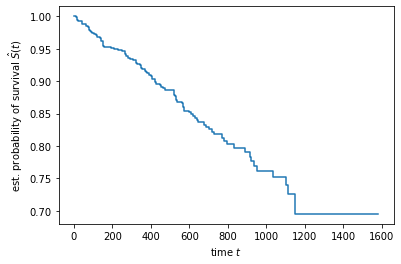

In [225]:
time, survival_prob = kaplan_meier_estimator(df_clin["D_Status"], df_clin["D_OS"])
plt.step(time, survival_prob, where="post")
#plt.plot([18*30]*2, range(2), linewidth=1, c='red')
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

The estimated curve is a step function, with steps occurring at time points where one or more patients died. From the plot we can see that most patients died in the first 1200 days. After the 600 days mark (which is approximately the threshold (540) for marking high risk patients, we notice a quick drop in estimated probability of survival)

**Survival functions by ISS**

In [226]:
df_clin["D_ISS"] = df_clin["D_ISS"].fillna(2)
df_clin["D_ISS"].value_counts(), df_clin["D_ISS"].unique()

(2.0    229
 1.0    189
 3.0    164
 Name: D_ISS, dtype: int64,
 array([1., 2., 3.]))

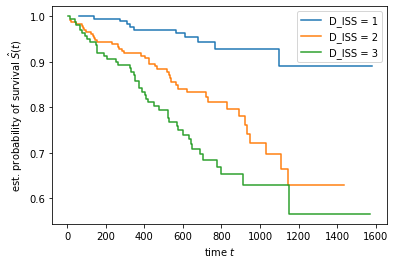

In [227]:
for d_iss in range(1, 4):
    mask_treat = df_clin["D_ISS"] == d_iss
    time_iss, survival_prob_treatment = kaplan_meier_estimator(
        df_clin["D_Status"][mask_treat],
        df_clin["D_OS"][mask_treat])

    plt.step(time_iss, survival_prob_treatment, where="post",
             label="D_ISS = %s" % d_iss)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

before the threshold (18 months = 540 days) The slope for the groups patients at a higher disease stage (D_ISS = 3) is steeper. D_ISS could be a strong predictor for High risk patients.

**Survival functions by Gender**

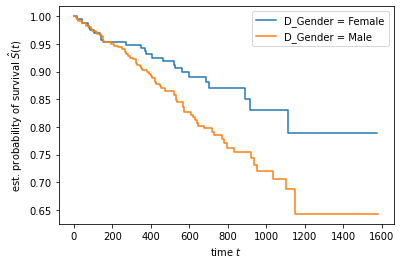

In [228]:
for d_gender in df_clin["D_Gender"].unique():
    mask_treat = df_clin["D_Gender"] == d_gender
    time_gender, survival_prob_treatment = kaplan_meier_estimator(
        df_clin["D_Status"][mask_treat],
        df_clin["D_OS"][mask_treat])

    plt.step(time_gender, survival_prob_treatment, where="post",
             label="D_Gender = %s" % d_gender)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

Unfortunately, the results are inconclusive, because the difference between the two estimated survival functions is too small to confidently argue that the drug affects survival or not.

### Multivariate Survival Models with Cox's model

Clinical model

Prepare labels

In [229]:
data_y = np.array([(df_clin.iloc[i]['D_Status'].astype(bool), df_clin.iloc[i]['D_OS']) for i in range(df_clin.shape[0])],
                 dtype=[('D_Status', bool), ('D_OS', np.int64)])
data_y 

array([(False, 1575), (False,  995), (False, 1572), (False, 1581),
       ( True,  934), (False, 1525), (False,   96), (False, 1573),
       (False,  609), (False, 1503), ( True,  564), (False, 1497),
       (False, 1429), (False, 1430), (False,  617), ( True,  830),
       (False, 1453), (False, 1035), (False, 1436), (False, 1373),
       (False, 1412), ( True,  118), (False, 1433), (False, 1328),
       ( True,  610), ( True,  270), ( True,  250), (False, 1357),
       (False, 1326), ( True,  372), ( True,  950), ( True,  191),
       (False, 1262), (False, 1312), (False, 1356), ( True,  914),
       (False, 1317), (False, 1275), (False, 1271), (False,  676),
       (False, 1335), ( True,  921), (False, 1215), (False, 1256),
       ( True,   85), (False, 1207), (False, 1144), (False, 1247),
       ( True,  463), (False, 1262), ( True, 1100), ( True, 1110),
       (False, 1312), ( True, 1147), (False, 1222), ( True,   45),
       (False, 1219), ( True,  150), ( True,  153), (False, 12

Prepare inputs

In [230]:
data_x = df_all #.loc[:, ["D_Age", "D_ISS"]]
#data_x = data_x.replace({"Female": 0, "Male": 1})
data_x

,707,890,891,1414,1544,1572,1884,2517,2576,2630,...,13989,14002,14261,14532,15291,15295,16695,16716,D_ISS,D_Age
MMRF_2211_1_BM,0.022575,0.010027,0.021282,0.000000,0.000000,0.007662,0.223904,0.333634,0.268966,0.053819,...,4.007144,0.015894,0.000000,0.015786,0.000000,0.030047,0.006990,0.000000,1.0,3
MMRF_1855_1_BM,0.059157,0.000000,0.000000,0.048451,0.000000,0.030293,0.017209,0.000000,0.000000,0.205018,...,0.000000,0.000000,0.000000,0.117411,0.006267,0.000000,0.006985,0.000000,1.0,2
MMRF_1981_1_BM,0.020852,0.001984,0.048039,1.374313,0.000000,0.024479,0.011931,0.000000,0.000000,0.056132,...,1.507919,0.005089,0.006777,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,4
MMRF_2364_1_BM,0.063777,0.003671,0.036304,0.071598,0.000000,0.006542,0.126087,0.000000,0.000000,2.689132,...,0.062053,0.015096,0.115856,0.003983,0.008024,0.000000,0.006702,0.000000,1.0,4
MMRF_2394_1_BM,0.391012,0.012379,0.035907,0.000000,0.043845,0.157341,0.084746,0.000000,0.005578,0.451209,...,0.907637,0.050190,0.005555,0.004494,0.004536,0.000000,0.004691,0.000000,2.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MMRF_2038_1_BM,0.032538,0.000000,0.000000,0.000000,0.009248,0.000000,0.224263,0.000000,0.000000,0.607213,...,0.000000,0.010614,0.006901,0.008364,0.000000,0.000000,0.000000,0.000000,1.0,4
MMRF_2313_1_BM,0.013445,0.140009,0.081518,0.001616,0.000000,0.049263,0.029682,0.000000,0.000000,0.927733,...,0.676975,0.013604,0.013107,0.024564,0.003579,0.000000,0.023903,0.000000,2.0,4
MMRF_1586_1_BM,0.000000,0.001547,0.056428,0.005716,0.000000,0.055147,0.000000,0.000000,0.000000,0.123423,...,0.051647,0.008638,0.000000,0.017231,0.000000,0.000000,0.003766,0.023447,2.0,4
MMRF_1312_1_BM,0.000000,0.000000,0.000000,0.090647,0.000000,0.025723,0.031952,0.007117,0.000000,0.098413,...,0.305829,0.009219,0.000000,0.000000,0.000000,0.018956,0.000000,0.000000,1.0,3


**Train/test splits**

In [231]:
df_train, df_test, y_train , y_test = train_test_split(data_x, data_y, test_size=0.2)

df_train.shape, df_test.shape

((465, 42), (117, 42))

In [232]:
estimator = CoxPHSurvivalAnalysis()
estimator.fit(df_train, y_train)

//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


CoxPHSurvivalAnalysis()

The result is a vector of coefficients, one for each variable, where each value corresponds to the log hazard ratio

In [233]:
#pd.Series(estimator.coef_, index=data_x.columns)

New unseen patients

In [234]:
#x_new = df_test[:4]
#pred_surv = estimator.predict_survival_function(x_new)
#time_points = np.arange(1, 1000)
#for i, surv_func in enumerate(pred_surv):
#    plt.step(time_points, surv_func(time_points), where="post",
#             label="Sample %d" % (i + 1))
#plt.ylabel("est. probability of survival $\hat{S}(t)$")
#plt.xlabel("time $t$")
#plt.legend(loc="best")

EVALUATION: concordance index 
The interpretation is identical to the traditional area under the ROC curve metric for binary classification: - a value of 0.5 denotes a random model, - a value of 1.0 denotes a perfect model, - a value of 0.0 denotes a perfectly wrong model.

In [236]:
pred_test = estimator.predict(df_test)
pred_train = estimator.predict(df_train)

score_train = concordance_index_censored(y_train["D_Status"], y_train["D_OS"], pred_train)
score_test = concordance_index_censored(y_test["D_Status"], y_test["D_OS"], pred_test)

score_train[0], score_test[0]

//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


(0.7865701232652358, 0.5673635307781649)

In [338]:
preds = estimator.predict_survival_function(df_test)

//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [339]:
preds

array([StepFunction(x=array([   1,   13,   41,   45,   58,   66,   72,   76,   77,   81,   85,
                86,   90,   91,   96,  104,  118,  120,  133,  139,  141,  144,
               150,  151,  152,  153,  154,  156,  157,  164,  173,  184,  191,
               207,  229,  231,  232,  235,  243,  246,  247,  250,  253,  254,
               256,  257,  260,  262,  264,  267,  268,  269,  270,  271,  274,
               278,  281,  282,  283,  288,  290,  292,  297,  301,  305,  308,
               323,  324,  325,  327,  329,  330,  333,  334,  335,  336,  337,
               340,  343,  344,  346,  347,  348,  349,  350,  351,  352,  353,
               354,  356,  358,  364,  366,  370,  371,  372,  373,  374,  375,
               376,  378,  380,  382,  385,  390,  393,  402,  404,  406,  408,
               416,  423,  425,  428,  429,  430,  431,  434,  435,  439,  444,
               445,  449,  453,  454,  455,  456,  457,  458,  462,  463,  467,
               475,  478,

In [314]:
pred_hr = []

In [324]:
for pred in preds:
    for i, t in enumerate(pred.x):
        if t >= 540:
            p = 1 - pred.y[i]
            print(p)
            pred_hr.append(p > 0.5)
            continue

0.021595505857501696
0.021595505857501696
0.021595505857501696
0.021595505857501696
0.021595505857501696
0.021595505857501696
0.021595505857501696
0.021595505857501696
0.022278653873691767
0.02296330067507424
0.02296330067507424
0.02364985734877567
0.024338034085302662
0.024338034085302662
0.024338034085302662
0.024338034085302662
0.0250465127253382
0.0250465127253382
0.0250465127253382
0.025775670202314416
0.025775670202314416
0.025775670202314416
0.025775670202314416
0.025775670202314416
0.025775670202314416
0.025775670202314416
0.025775670202314416
0.025775670202314416
0.025775670202314416
0.025775670202314416
0.025775670202314416
0.026580709589756335
0.026580709589756335
0.026580709589756335
0.026580709589756335
0.026580709589756335
0.026580709589756335
0.026580709589756335
0.026580709589756335
0.027480478430335298
0.027480478430335298
0.027480478430335298
0.02841370717602154
0.02841370717602154
0.02841370717602154
0.02841370717602154
0.02841370717602154
0.02841370717602154
0.02841

0.31312167580273387
0.31312167580273387
0.31312167580273387
0.31312167580273387
0.32523757069084824
0.32523757069084824
0.32523757069084824
0.32523757069084824
0.32523757069084824
0.33779162434116305
0.33779162434116305
0.33779162434116305
0.33779162434116305
0.33779162434116305
0.33779162434116305
0.33779162434116305
0.35073237434258786
0.35073237434258786
0.35073237434258786
0.35073237434258786
0.35073237434258786
0.35073237434258786
0.35073237434258786
0.35073237434258786
0.35073237434258786
0.35073237434258786
0.35073237434258786
0.35073237434258786
0.35073237434258786
0.35073237434258786
0.35073237434258786
0.35073237434258786
0.35073237434258786
0.35073237434258786
0.35073237434258786
0.35073237434258786
0.35073237434258786
0.35073237434258786
0.35073237434258786
0.35073237434258786
0.367072451968092
0.367072451968092
0.367072451968092
0.367072451968092
0.367072451968092
0.38392715512617626
0.38392715512617626
0.38392715512617626
0.38392715512617626
0.4020658105663002
0.402065810

0.2637823823009462
0.2637823823009462
0.2775610798789868
0.2775610798789868
0.2912132925279144
0.2912132925279144
0.2912132925279144
0.30544240064713324
0.30544240064713324
0.30544240064713324
0.30544240064713324
0.30544240064713324
0.30544240064713324
0.30544240064713324
0.30544240064713324
0.30544240064713324
0.30544240064713324
0.30544240064713324
0.30544240064713324
0.30544240064713324
0.30544240064713324
0.30544240064713324
0.30544240064713324
0.30544240064713324
0.3219100046252811
0.3219100046252811
0.3219100046252811
0.3219100046252811
0.3219100046252811
0.3219100046252811
0.3219100046252811
0.3219100046252811
0.3219100046252811
0.3219100046252811
0.3219100046252811
0.3219100046252811
0.3219100046252811
0.3219100046252811
0.3219100046252811
0.3427659418589065
0.3427659418589065
0.3427659418589065
0.3427659418589065
0.3427659418589065
0.3427659418589065
0.3427659418589065
0.3427659418589065
0.3427659418589065
0.3427659418589065
0.3687409852744895
0.3687409852744895
0.368740985274

2.709587171068062e-05
2.709587171068062e-05
2.709587171068062e-05
2.709587171068062e-05
2.709587171068062e-05
2.709587171068062e-05
2.802596256590295e-05
2.802596256590295e-05
2.802596256590295e-05
2.8991549553492035e-05
2.8991549553492035e-05
2.8991549553492035e-05
2.8991549553492035e-05
2.8991549553492035e-05
2.8991549553492035e-05
2.8991549553492035e-05
2.8991549553492035e-05
2.8991549553492035e-05
3.0001762522879893e-05
3.0001762522879893e-05
3.0001762522879893e-05
3.0001762522879893e-05
3.0001762522879893e-05
3.0001762522879893e-05
3.0001762522879893e-05
3.0001762522879893e-05
3.0001762522879893e-05
3.0001762522879893e-05
3.0001762522879893e-05
3.0001762522879893e-05
3.0001762522879893e-05
3.0001762522879893e-05
3.0001762522879893e-05
3.0001762522879893e-05
3.0001762522879893e-05
3.0001762522879893e-05
3.0001762522879893e-05
3.0001762522879893e-05
3.0001762522879893e-05
3.0001762522879893e-05
3.0001762522879893e-05
3.0001762522879893e-05
3.0001762522879893e-05
3.0001762522879893e-

0.22711846989344975
0.22711846989344975
0.22711846989344975
0.22711846989344975
0.22711846989344975
0.22711846989344975
0.242966033056782
0.242966033056782
0.242966033056782
0.242966033056782
0.242966033056782
0.242966033056782
0.242966033056782
0.242966033056782
0.242966033056782
0.242966033056782
0.2629424039660917
0.2629424039660917
0.2629424039660917
0.2629424039660917
0.2629424039660917
0.2629424039660917
0.2629424039660917
0.2629424039660917
0.2629424039660917
0.2629424039660917
0.2629424039660917
0.2629424039660917
0.2629424039660917
0.2629424039660917
0.2629424039660917
0.2629424039660917
0.2629424039660917
0.2629424039660917
0.2629424039660917
0.2629424039660917
0.2629424039660917
0.2629424039660917
0.2629424039660917
0.2629424039660917
0.2629424039660917
0.2629424039660917
0.2629424039660917
0.2629424039660917
0.15551155330862776
0.15551155330862776
0.15551155330862776
0.15551155330862776
0.15551155330862776
0.15551155330862776
0.15551155330862776
0.15551155330862776
0.160065

0.051778488962497815
0.051778488962497815
0.051778488962497815
0.051778488962497815
0.051778488962497815
0.051778488962497815
0.051778488962497815
0.051778488962497815
0.051778488962497815
0.051778488962497815
0.054164196605556714
0.054164196605556714
0.054164196605556714
0.054164196605556714
0.054164196605556714
0.056675292749936546
0.056675292749936546
0.056675292749936546
0.056675292749936546
0.056675292749936546
0.056675292749936546
0.056675292749936546
0.05930688038669496
0.05930688038669496
0.05930688038669496
0.05930688038669496
0.05930688038669496
0.05930688038669496
0.05930688038669496
0.05930688038669496
0.05930688038669496
0.05930688038669496
0.05930688038669496
0.05930688038669496
0.05930688038669496
0.05930688038669496
0.05930688038669496
0.05930688038669496
0.05930688038669496
0.05930688038669496
0.05930688038669496
0.05930688038669496
0.05930688038669496
0.05930688038669496
0.05930688038669496
0.05930688038669496
0.06269483923068486
0.06269483923068486
0.0626948392306848

0.05596242440767718
0.05596242440767718
0.05596242440767718
0.05596242440767718
0.057681934948769054
0.057681934948769054
0.057681934948769054
0.057681934948769054
0.057681934948769054
0.057681934948769054
0.057681934948769054
0.057681934948769054
0.0596017538410375
0.0596017538410375
0.0596017538410375
0.06159070491800023
0.06159070491800023
0.06159070491800023
0.06159070491800023
0.06159070491800023
0.06159070491800023
0.06159070491800023
0.06159070491800023
0.06159070491800023
0.0636670776383369
0.0636670776383369
0.0636670776383369
0.0636670776383369
0.0636670776383369
0.0636670776383369
0.0636670776383369
0.0636670776383369
0.0636670776383369
0.0636670776383369
0.0636670776383369
0.0636670776383369
0.0636670776383369
0.0636670776383369
0.0636670776383369
0.0636670776383369
0.0636670776383369
0.0636670776383369
0.0636670776383369
0.0636670776383369
0.0636670776383369
0.0636670776383369
0.0636670776383369
0.0636670776383369
0.0636670776383369
0.0636670776383369
0.0636670776383369
0.

0.10434148360750073
0.10434148360750073
0.10434148360750073
0.10434148360750073
0.10434148360750073
0.10434148360750073
0.10434148360750073
0.10749355246028491
0.11064360600303758
0.11064360600303758
0.1137934880106084
0.11694181893727607
0.11694181893727607
0.11694181893727607
0.11694181893727607
0.1201736527803513
0.1201736527803513
0.1201736527803513
0.12348990546740146
0.12348990546740146
0.12348990546740146
0.12348990546740146
0.12348990546740146
0.12348990546740146
0.12348990546740146
0.12348990546740146
0.12348990546740146
0.12348990546740146
0.12348990546740146
0.12348990546740146
0.12713962378741794
0.12713962378741794
0.12713962378741794
0.12713962378741794
0.12713962378741794
0.12713962378741794
0.12713962378741794
0.12713962378741794
0.13120437451149847
0.13120437451149847
0.13120437451149847
0.1354042319889437
0.1354042319889437
0.1354042319889437
0.1354042319889437
0.1354042319889437
0.1354042319889437
0.1354042319889437
0.1354042319889437
0.1354042319889437
0.13977646606

0.02384178622748756
0.02384178622748756
0.02384178622748756
0.02384178622748756
0.02384178622748756
0.02384178622748756
0.02384178622748756
0.02384178622748756
0.025734182293943753
0.025734182293943753
0.025734182293943753
0.025734182293943753
0.025734182293943753
0.025734182293943753
0.025734182293943753
0.025734182293943753
0.025734182293943753
0.025734182293943753
0.028171440176652518
0.028171440176652518
0.028171440176652518
0.028171440176652518
0.028171440176652518
0.028171440176652518
0.028171440176652518
0.028171440176652518
0.028171440176652518
0.028171440176652518
0.028171440176652518
0.028171440176652518
0.028171440176652518
0.028171440176652518
0.028171440176652518
0.028171440176652518
0.028171440176652518
0.028171440176652518
0.028171440176652518
0.028171440176652518
0.028171440176652518
0.028171440176652518
0.028171440176652518
0.028171440176652518
0.028171440176652518
0.028171440176652518
0.028171440176652518
0.028171440176652518
0.045362178807413445
0.045362178807413445


0.001336234952181825
0.001336234952181825
0.0013756207902608786
0.0013756207902608786
0.0013756207902608786
0.0013756207902608786
0.0013756207902608786
0.0013756207902608786
0.0013756207902608786
0.0013756207902608786
0.0013756207902608786
0.0013756207902608786
0.0013756207902608786
0.0013756207902608786
0.001419137878820198
0.001419137878820198
0.001419137878820198
0.001419137878820198
0.001419137878820198
0.001419137878820198
0.001419137878820198
0.001419137878820198
0.0014678160128474005
0.0014678160128474005
0.0014678160128474005
0.001518349444175282
0.001518349444175282
0.001518349444175282
0.001518349444175282
0.001518349444175282
0.001518349444175282
0.001518349444175282
0.001518349444175282
0.001518349444175282
0.0015712156650341536
0.0015712156650341536
0.0015712156650341536
0.0015712156650341536
0.0015712156650341536
0.0015712156650341536
0.0015712156650341536
0.0015712156650341536
0.0015712156650341536
0.0015712156650341536
0.0015712156650341536
0.0015712156650341536
0.00157

In [325]:
np.mean(pred_hr)

0.10839713209381456

In [323]:
y_test

array([(False,  710), (False,  639), (False,  350), ( True,   21),
       (False,  243), (False,  276), (False,  879), (False,  184),
       (False,  793), (False, 1247), (False, 1275), (False,  495),
       (False, 1436), (False,  454), (False,  845), (False, 1110),
       (False,  675), ( True, 1110), ( True,   77), ( True,  891),
       (False, 1082), (False,  605), (False, 1573), (False,  758),
       (False,  743), (False,  527), (False,  912), (False,  371),
       (False,  617), (False, 1093), (False,  526), (False,  616),
       (False,  541), (False,  262), (False,  880), ( True,  264),
       (False,  811), (False,  851), (False,  456), ( True,  292),
       ( True,  352), (False,  676), (False,  371), (False,  974),
       ( True,  264), (False,  282), (False,  337), (False,  453),
       ( True,   90), (False,  497), (False,  344), (False,  491),
       (False,  393), ( True,  271), ( True,  139), (False,  356),
       (False,  617), (False,  445), (False, 1037), ( True,  5

**Feature Importance**

In [237]:
def fit_and_score_features(X, y):
    n_features = X.shape[1]
    scores = np.empty(n_features)
    m = CoxPHSurvivalAnalysis()
    for j in range(n_features):
        Xj = X[:, j:j+1]
        m.fit(Xj, y)
        scores[j] = m.score(Xj, y)
    return scores

scores = fit_and_score_features(df_train.values, y_train)
pd.Series(scores, index=df_train.columns).sort_values(ascending=False)

D_ISS    0.669253
D_Age    0.613525
7157     0.551827
707      0.542690
3270     0.538682
4198     0.529847
4710     0.529006
1544     0.525752
8344     0.524825
4191     0.523532
14532    0.517563
8767     0.516529
2630     0.515537
890      0.515042
4588     0.514848
16716    0.513620
16695    0.512434
7088     0.510301
1414     0.506142
12657    0.502177
2743     0.501508
7147     0.500603
11951    0.499785
11883    0.495216
12764    0.492414
14261    0.492264
2576     0.490238
15291    0.488622
1884     0.488471
2517     0.487242
11170    0.485669
1572     0.483514
891      0.482868
2722     0.481036
13915    0.480002
15295    0.477308
13989    0.475886
5240     0.472028
7757     0.469658
11315    0.465693
14002    0.459982
8536     0.445802
dtype: float64

**Feature Selection**

In [159]:
pipe = Pipeline([('select', SelectKBest(fit_and_score_features, k=5)),
                 ('model', CoxPHSurvivalAnalysis())])

param_grid = {'select__k': np.arange(1, data_x.shape[1] + 1)}
cv = KFold(n_splits=3, random_state=1, shuffle=True)
gcv = GridSearchCV(pipe, param_grid, return_train_score=True, cv=cv)
gcv.fit(data_x, data_y)

results = pd.DataFrame(gcv.cv_results_).sort_values(by='mean_test_score', ascending=False)
results.loc[:, ~results.columns.str.endswith("_time")]

//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarni

//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarni

//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarni

//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarni

//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarni

//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarni

//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarni

//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarni

//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarni

//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarni

//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarni

//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarni

//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarni

//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarni

//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarni

,param_select__k,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
1,2,{'select__k': 2},0.551257,0.597060,0.593844,0.580720,0.020875,1,0.602147,0.600409,0.602453,0.601669,0.000900
2,3,{'select__k': 3},0.540918,0.605815,0.594665,0.580466,0.028333,2,0.610104,0.598314,0.599794,0.602738,0.005244
3,4,{'select__k': 4},0.528730,0.598605,0.589688,0.572341,0.031052,3,0.606001,0.597586,0.611355,0.604981,0.005667
5,6,{'select__k': 6},0.536729,0.594765,0.582246,0.571247,0.024937,4,0.598126,0.595300,0.615681,0.603036,0.009016
4,5,{'select__k': 5},0.531015,0.591722,0.578139,0.566959,0.026014,5,0.604435,0.598672,0.616646,0.606584,0.007494
6,7,{'select__k': 7},0.534770,0.579127,0.581859,0.565252,0.021583,6,0.599478,0.592631,0.615618,0.602576,0.009637
7,8,{'select__k': 8},0.539776,0.559416,0.581956,0.560383,0.017234,7,0.604554,0.578365,0.615493,0.599471,0.015578
12,13,{'select__k': 13},0.568179,0.563255,0.547888,0.559774,0.008642,8,0.594877,0.583602,0.615442,0.597974,0.013182
10,11,{'select__k': 11},0.568397,0.559697,0.551078,0.559724,0.007071,9,0.600498,0.585262,0.615819,0.600526,0.012475
14,15,{'select__k': 15},0.566547,0.550894,0.561709,0.559717,0.006544,10,0.594972,0.587126,0.622013,0.601370,0.014944


In [166]:
pipe.set_params(**gcv.best_params_)
pipe.fit(data_x, data_y)

transformer, final_estimator = [s[1] for s in pipe.steps]
pd.Series(final_estimator.coef_, index=encoder.encoded_columns_[transformer.get_support()])

//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
//anaconda3/envs/owkin/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


### Evaluation

The most frequently used evaluation metric of survival models is the concordance index (c index, c statistic). It is a measure of rank correlation between predicted risk scores 𝑓̂  and observed time points 𝑦 that is closely related to Kendall’s τ.

In [264]:
df_train, df_test, y_train , y_test = train_test_split(data_x, data_y, test_size=0.2)

df_train.shape, df_test.shape

((465, 42), (117, 42))

In [265]:
y_events = y_train[y_train['D_Status']]
train_min, train_max = y_events["D_OS"].min(), y_events["D_OS"].max()

y_events = y_test[y_test['D_Status']]
test_min, test_max = y_events["D_OS"].min(), y_events["D_OS"].max()

assert train_min <= test_min < test_max < train_max, \
    "time range or test data is not within time range of training data."

In [267]:
from sksurv.datasets import load_veterans_lung_cancer

x, y = load_veterans_lung_cancer()
x

,Age_in_years,Celltype,Karnofsky_score,Months_from_Diagnosis,Prior_therapy,Treatment
0,69.0,squamous,60.0,7.0,no,standard
1,64.0,squamous,70.0,5.0,yes,standard
2,38.0,squamous,60.0,3.0,no,standard
3,63.0,squamous,60.0,9.0,yes,standard
4,65.0,squamous,70.0,11.0,yes,standard
...,...,...,...,...,...,...
132,65.0,large,75.0,1.0,no,test
133,64.0,large,60.0,5.0,no,test
134,67.0,large,70.0,18.0,yes,test
135,65.0,large,80.0,4.0,no,test


In [268]:
x.columns

Index(['Age_in_years', 'Celltype', 'Karnofsky_score', 'Months_from_Diagnosis',
       'Prior_therapy', 'Treatment'],
      dtype='object')

In [278]:
(pred_test)

//anaconda3/envs/owkin/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


array([ 1.19185293,  0.83377245,  0.45272693,         nan,         nan,
        0.63965005,         nan,  0.57007349,  0.74660465,  1.26754576,
        0.73326097,  1.37462861,         nan,  0.13503252, -0.2740541 ,
        0.6300111 ,  1.30728161,  1.30378025,  1.01270288,  1.1844858 ,
        1.47864613,  0.88281587,  1.02417644,         nan,  1.0203587 ,
        0.99976298,  1.65517858,  1.59362571,  1.58262537,  1.09959551,
        0.18270319,  0.33344689,  1.16946453,  0.40502239,  0.52945203,
        1.20983225,  1.33451006,  1.72364568,  1.19883836,  0.14600279,
        1.55439091,  1.30733765,  1.93767826,  1.33133537,  0.80422624,
        1.35554801,  0.80678161,  1.55469757, -0.81779373,  1.31908706,
        1.32310957,         nan,  1.40651656,  1.31021008,  0.32186712,
        1.38164232,  1.38823001,  1.04342633,  1.37606761,  1.43694639,
        1.40543428,  0.7425433 ,  0.97010849,  1.76341085,  1.37792551,
        1.24272329,  1.74197251,  1.63669826,  0.99383155,  1.04